# 442 Giriş Dersi

In [129]:
import numpy as np
from ROOT import TCanvas, TGraphErrors, TF1, gStyle
from ROOT import gROOT
from array import array

In [130]:
t = np.array([3.73, 18.82, 37.25, 61.08, 94.32, 153.63])
s = np.diff(t)
lns = np.log(s)
T = [(t[i]+t[i+1])/2 for i in range (len(t)-1)]
Tt = np.around(T, decimals=5)
Ser = np.sqrt(2)/(4*np.array(s))
Ter = [np.sqrt(2)/8 for i in range (len(t)-1)]


In [131]:
ndata = 5

x  =  array( 'f', Tt)
y  =  array( 'f', lns)
sx =  array( 'f', Ter)
sy =  array( 'f', Ser)

 FCN=1.59318 FROM MIGRAD    STATUS=CONVERGED      86 CALLS          87 TOTAL
                     EDM=2.15785e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.22142e-02   1.31882e-04   3.71960e-08   2.65243e+00
   2  p1           2.56648e+00   1.35541e-02   3.82282e-06   7.16665e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: eps file 4500_15.eps has been created


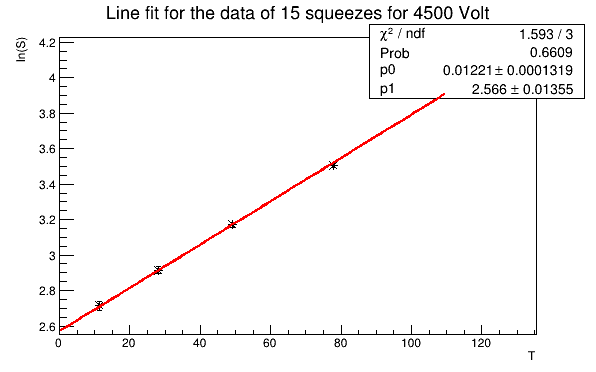

In [132]:
c1 = TCanvas( 'c1', 'A Simple Graph with error bars', 200, 10, 600, 400 )
             
mygraph = TGraphErrors(ndata,x,y,sx,sy)
mygraph.Draw("A*")
mygraph.SetTitle("Line fit for the data of 15 squeezes for 4500 Volt")
mygraph.GetXaxis().SetTitle("T")
mygraph.GetYaxis().SetTitle("ln(S)")


fnew = TF1("fnew","[0]*x+[1]",0,110)
fnew.SetParameters(3.1416,2.7182)
mygraph.Fit(fnew)
gStyle.SetOptFit(1111)
fnew.Draw("same")

c1.Draw()
c1.SaveAs("4500_15.eps")